# Perfil de intesidad por recorte de pixel E2

In [53]:
# Importamos las librerias necesarias
import cv2
from PIL import Image
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray 
import matplotlib.pyplot as plt

## Analisis para una sola imagen

In [54]:
# Cargamos imagen, se convierte a matriz
image = imread('../Malus/PP9.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


In [55]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

In [56]:
# Convertimos la imagen a escala de grises
image = rgb2gray(image)

print(type(image))

# Shape of the image
print("Shape of the image", image.shape)

<class 'numpy.ndarray'>
Shape of the image (1024, 1280)


### Recortamos por pixel

In [57]:
# Seleccionamos la línea central de la imagen en escala de grises
linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

# Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
centro = len(linea_pixeles) // 2
offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes 

# Seleccionamos 7 puntos específicos en la línea central, incluyendo los nuevos puntos
puntos_seleccionados = [
    centro - 2 * offset,        # Punto 1: A la izquierda del centro
    centro - 1.38 * offset,      # Punto entre el 1 y el 2
    centro - offset,            # Punto 2: A la izquierda del centro
    centro,                     # Punto 3: Punto central
    centro + offset,            # Punto 4: A la derecha del centro
    centro + 1.38 * offset,      # Punto entre el 4 y el 5
    centro + 2 * offset         # Punto 5: A la derecha del centro
]

# Obtenemos las intensidades correspondientes a estos puntos
intensidades = [linea_pixeles[int(punto)] for punto in puntos_seleccionados]

# Creamos un DataFrame para mostrar las intensidades de los puntos seleccionados
df_puntos_intensidad = pd.DataFrame({
    'Pixel': puntos_seleccionados,
    'Intensidad': intensidades
})

# Mostramos el DataFrame resultante
print(df_puntos_intensidad)


    Pixel  Intensidad
0  384.00    0.176968
1  463.36    0.989167
2  512.00    1.000000
3  640.00    1.000000
4  768.00    1.000000
5  816.64    0.844984
6  896.00    0.065337


## Analisis para todas las imagenes de la carpeta

In [58]:
# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde B0 hasta B36
for i in range(37):
    # Formateamos el nombre de la imagen
    img_path = f'../Malus/PP{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Seleccionamos la línea central de la imagen
    linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

    # Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
    centro = len(linea_pixeles) // 2
    offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes

    # Seleccionamos 7 puntos específicos en la línea central, incluyendo los nuevos puntos
    puntos_seleccionados = [
        centro - 2 * offset,        # Punto 1: A la izquierda del centro
        centro - 1.38 * offset,      # Punto entre el 1 y el 2
        centro - offset,            # Punto 2: A la izquierda del centro
        centro,                     # Punto 3: Punto central
        centro + offset,            # Punto 4: A la derecha del centro
        centro + 1.38 * offset,      # Punto entre el 4 y el 5
        centro + 2 * offset         # Punto 5: A la derecha del centro
    ]

    # Obtenemos las intensidades correspondientes a estos puntos
    intensidades = [linea_pixeles[int(punto)] for punto in puntos_seleccionados]

    # Guardamos los resultados en la lista
    results.append({
        'Image': f'B{i}.png',
        'Pixel 1': intensidades[0],
        'Pixel entre 1 y 2': intensidades[1],
        'Pixel 2': intensidades[2],
        'Pixel 3': intensidades[3],
        'Pixel 4': intensidades[4],
        'Pixel entre 4 y 5': intensidades[5],
        'Pixel 5': intensidades[6]
    })

# Convertimos los resultados a un DataFrame
df_results = pd.DataFrame(results)

# Mostramos el DataFrame resultante
print(df_results)


      Image   Pixel 1  Pixel entre 1 y 2   Pixel 2   Pixel 3   Pixel 4  \
0    B0.png  0.010649           0.010649  0.010649  0.013171  0.010649   
1    B1.png  0.013171           0.052999  0.132073  0.456601  0.139664   
2    B2.png  0.025227           0.303743  0.665401  0.909345  0.636902   
3    B3.png  0.043176           0.696123  0.892455  1.000000  0.805534   
4    B4.png  0.068142           0.765519  1.000000  1.000000  0.969167   
5    B5.png  0.107136           0.827127  1.000000  1.000000  1.000000   
6    B6.png  0.142469           0.892024  1.000000  1.000000  1.000000   
7    B7.png  0.169691           0.937500  1.000000  1.000000  1.000000   
8    B8.png  0.162941           0.991667  1.000000  1.000000  1.000000   
9    B9.png  0.176968           0.989167  1.000000  1.000000  1.000000   
10  B10.png  0.185385           1.000000  1.000000  1.000000  1.000000   
11  B11.png  0.168552           0.993333  1.000000  1.000000  1.000000   
12  B12.png  0.106570           0.9850

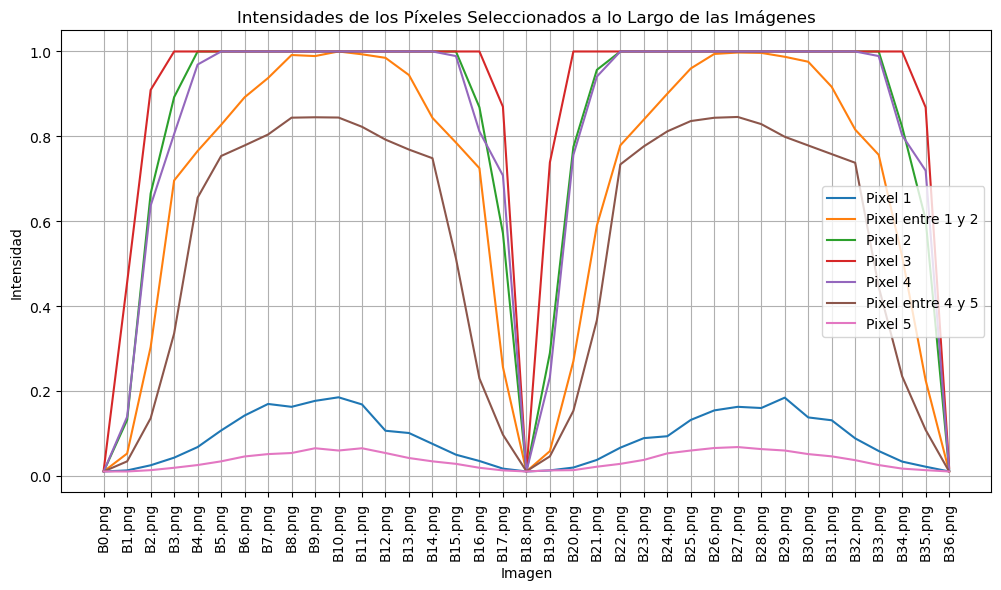

In [59]:
# Graficamos los resultados
plt.figure(figsize=(12, 6))

# Recorremos todas las columnas relevantes en df_results para graficar los 7 puntos
for column in df_results.columns[1:]:
    plt.plot(df_results['Image'], df_results[column], label=column)

plt.xlabel('Imagen')
plt.ylabel('Intensidad')
plt.title('Intensidades de los Píxeles Seleccionados a lo Largo de las Imágenes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


## Analisis para una foto en segmento promediado de pixel

In [60]:

# Lista para almacenar las intensidades promedio
promedios_intensidad = []

# Recorremos cada punto seleccionado para calcular el promedio de intensidad en un cuadrado de 5x5 píxeles
for punto in puntos_seleccionados:
    # Definimos el rango de filas y columnas para el cuadrado 5x5
    fila_inicio = max(0, (image.shape[0] // 2) - 2)
    fila_fin = min(image.shape[0], (image.shape[0] // 2) + 3)
    columna_inicio = max(0, int(punto) - 2)
    columna_fin = min(image.shape[1], int(punto) + 3)
    
    # Extraemos la región 5x5 alrededor del punto
    region = image[fila_inicio:fila_fin, columna_inicio:columna_fin]
    
    # Calculamos el promedio de intensidad en la región
    promedio_intensidad = np.mean(region)
    
    # Guardamos el promedio en la lista
    promedios_intensidad.append(promedio_intensidad)

# Creamos un DataFrame para mostrar los promedios de intensidad
df_promedios_intensidad = pd.DataFrame({
    'Pixel': ['Punto 1', 'Punto entre 1 y 2', 'Punto 2', 'Punto 3', 'Punto 4', 'Punto entre 4 y 5', 'Punto 5'],
    'Intensidad Promedio 5x5': promedios_intensidad
})

# Mostramos el DataFrame resultante
print(df_promedios_intensidad)


               Pixel  Intensidad Promedio 5x5
0            Punto 1                 0.010649
1  Punto entre 1 y 2                 0.011860
2            Punto 2                 0.013354
3            Punto 3                 0.018741
4            Punto 4                 0.012869
5  Punto entre 4 y 5                 0.010750
6            Punto 5                 0.010649


       Image   Pixel 1  Pixel entre 1 y 2   Pixel 2   Pixel 3   Pixel 4  \
0    PP0.png  0.010850           0.010750  0.010649  0.011153  0.010850   
1    PP1.png  0.012768           0.056622  0.161218  0.421232  0.128570   
2    PP2.png  0.019462           0.276494  0.725105  0.903446  0.626403   
3    PP3.png  0.035055           0.635267  0.884700  1.000000  0.802933   
4    PP4.png  0.056799           0.772415  0.995900  1.000000  0.966684   
5    PP5.png  0.081056           0.835257  1.000000  1.000000  1.000000   
6    PP6.png  0.105803           0.904484  1.000000  1.000000  1.000000   
7    PP7.png  0.121941           0.943686  1.000000  1.000000  1.000000   
8    PP8.png  0.139752           0.986200  1.000000  1.000000  1.000000   
9    PP9.png  0.142764           0.987467  1.000000  1.000000  1.000000   
10  PP10.png  0.151869           0.998367  1.000000  1.000000  1.000000   
11  PP11.png  0.145732           0.991300  1.000000  1.000000  1.000000   
12  PP12.png  0.124078   

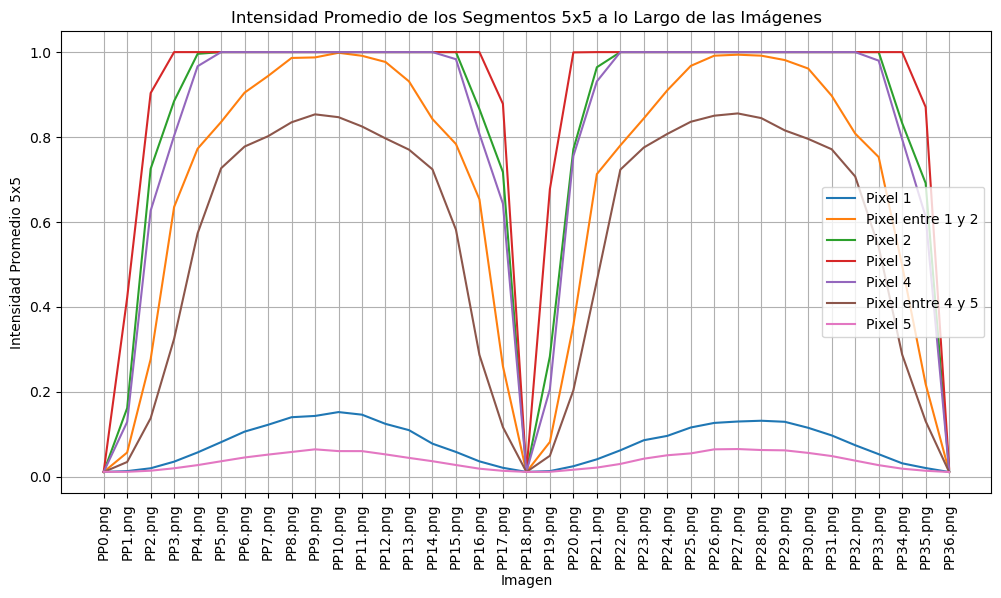

In [61]:
# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde B0 hasta B36
for i in range(37):
    # Formateamos el nombre de la imagen
    img_path = f'../Malus/PP{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Seleccionamos la línea central de la imagen en escala de grises
    linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

    # Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
    centro = len(linea_pixeles) // 2
    offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes

    # Seleccionamos 7 puntos específicos en la línea central
    puntos_seleccionados = [
        centro - 2 * offset,        # Punto 1: A la izquierda del centro
        centro - 1.38 * offset,      # Punto entre el 1 y el 2
        centro - offset,            # Punto 2: A la izquierda del centro
        centro,                     # Punto 3: Punto central
        centro + offset,            # Punto 4: A la derecha del centro
        centro + 1.38 * offset,      # Punto entre el 4 y el 5
        centro + 2 * offset         # Punto 5: A la derecha del centro
    ]

    # Lista para almacenar las intensidades promedio de los segmentos 5x5
    promedios_intensidad = []

    # Recorremos cada punto seleccionado para calcular el promedio de intensidad en un cuadrado de 5x5 píxeles
    for punto in puntos_seleccionados:
        # Definimos el rango de filas y columnas para el cuadrado 5x5
        fila_inicio = max(0, (image.shape[0] // 2) - 2)
        fila_fin = min(image.shape[0], (image.shape[0] // 2) + 3)
        columna_inicio = max(0, int(punto) - 2)
        columna_fin = min(image.shape[1], int(punto) + 3)
        
        # Extraemos la región 5x5 alrededor del punto
        region = image[fila_inicio:fila_fin, columna_inicio:columna_fin]
        
        # Calculamos el promedio de intensidad en la región
        promedio_intensidad = np.mean(region)
        
        # Guardamos el promedio en la lista
        promedios_intensidad.append(promedio_intensidad)

    # Guardamos los resultados en la lista
    results.append({
        'Image': f'PP{i}.png',
        'Pixel 1': promedios_intensidad[0],
        'Pixel entre 1 y 2': promedios_intensidad[1],
        'Pixel 2': promedios_intensidad[2],
        'Pixel 3': promedios_intensidad[3],
        'Pixel 4': promedios_intensidad[4],
        'Pixel entre 4 y 5': promedios_intensidad[5],
        'Pixel 5': promedios_intensidad[6]
    })

# Convertimos los resultados a un DataFrame
df_results = pd.DataFrame(results)

# Mostramos el DataFrame resultante
print(df_results)

# Graficamos los resultados
plt.figure(figsize=(12, 6))

# Recorremos todas las columnas relevantes en df_results para graficar los 7 puntos
for column in df_results.columns[1:]:
    plt.plot(df_results['Image'], df_results[column], label=column)

plt.xlabel('Imagen')
plt.ylabel('Intensidad Promedio 5x5')
plt.title('Intensidad Promedio de los Segmentos 5x5 a lo Largo de las Imágenes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


## Codigo anterior, ignorar si no es util

In [62]:
# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde B0 hasta B36
for i in range(37):
    # Formateamos el nombre de la imagen
    img_path = f'../Malus/PP{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Seleccionamos la línea central de la imagen
    linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

    # Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
    centro = len(linea_pixeles) // 2
    offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes

    # Seleccionamos 5 puntos específicos en la línea central
    puntos_seleccionados = [
        centro - 2 * offset,  # Punto 1: A la izquierda del centro
        centro - offset,      # Punto 2: A la izquierda del centro
        centro,               # Punto 3: Punto central
        centro + offset,      # Punto 4: A la derecha del centro
        centro + 2 * offset   # Punto 5: A la derecha del centro
    ]

    # Obtenemos las intensidades correspondientes a estos puntos
    intensidades = [linea_pixeles[punto] for punto in puntos_seleccionados]

    # Guardamos los resultados en la lista
    results.append({
        'Image': f'B{i}.png',
        'Pixel 1': intensidades[0],
        'Pixel 2': intensidades[1],
        'Pixel 3': intensidades[2],
        'Pixel 4': intensidades[3],
        'Pixel 5': intensidades[4]
    })

# Convertimos los resultados a un DataFrame
df_results = pd.DataFrame(results)

# Mostramos el DataFrame resultante
print(df_results)

      Image   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5
0    B0.png  0.010649  0.010649  0.013171  0.010649  0.010649
1    B1.png  0.013171  0.132073  0.456601  0.139664  0.010649
2    B2.png  0.025227  0.665401  0.909345  0.636902  0.013737
3    B3.png  0.043176  0.892455  1.000000  0.805534  0.019348
4    B4.png  0.068142  1.000000  1.000000  0.969167  0.025792
5    B5.png  0.107136  1.000000  1.000000  1.000000  0.034491
6    B6.png  0.142469  1.000000  1.000000  1.000000  0.045981
7    B7.png  0.169691  1.000000  1.000000  1.000000  0.051592
8    B8.png  0.162941  1.000000  1.000000  1.000000  0.054115
9    B9.png  0.176968  1.000000  1.000000  1.000000  0.065337
10  B10.png  0.185385  1.000000  1.000000  1.000000  0.060009
11  B11.png  0.168552  1.000000  1.000000  1.000000  0.065337
12  B12.png  0.106570  1.000000  1.000000  1.000000  0.054115
13  B13.png  0.101250  1.000000  1.000000  1.000000  0.042342
14  B14.png  0.075718  1.000000  1.000000  1.000000  0.034491
15  B15.